# --------------------------------------- Workshop #4 -------------------------------------


* This workshop includes marked tasks that comprise 15% of your final mark in this module. 

* You need to read the examples in Lecture #4 and Lecture #4 exercise to complete the tasks. 

# Tasks

## TASK 4.1:  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods (10%).

## NOTE: You should comment on your code wherever necessary and briefly explain what the code is doing

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

#Import the important things
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
#import seaborn as sns
#import plotly.express as px

In [2]:
df = pd.read_csv('C:/Users/Uche Buzz/Desktop/School stuff/Data Mining and Infomatics/Dataset/adult_WS4.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [4]:
df.dropna( inplace = True )

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# transform data

df[['education','workclass','marital-status', 'occupation',
       'sex', 'native-country','race','relationship']] = encoder.fit_transform(df[['education',
                                                                                      'workclass','marital-status', 'occupation', 'sex', 'native-country','race','relationship']])

In [8]:
S = df.iloc[:, [0, 9, 7]]


In [9]:
S

,age,sex,relationship
0,29,0.0,5.0
1,36,1.0,0.0
2,25,0.0,5.0
3,47,1.0,0.0
4,33,1.0,0.0
...,...,...,...
9995,19,0.0,3.0
9996,53,0.0,1.0
9997,30,1.0,0.0
9998,41,0.0,5.0


In [8]:
#normalising the input data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
S = scaler.fit_transform(S)

In [9]:
S

array([[0.16438356, 0.        , 1.        ],
       [0.26027397, 1.        , 0.        ],
       [0.10958904, 0.        , 1.        ],
       ...,
       [0.17808219, 1.        , 0.        ],
       [0.32876712, 0.        , 1.        ],
       [0.05479452, 0.        , 0.8       ]])

In [10]:
S = pd.DataFrame(S)

In [11]:
S

,0,1,2
0,0.164384,0.0,1.0
1,0.260274,1.0,0.0
2,0.109589,0.0,1.0
3,0.410959,1.0,0.0
4,0.219178,1.0,0.0
...,...,...,...
9760,0.027397,0.0,0.6
9761,0.493151,0.0,0.2
9762,0.178082,1.0,0.0
9763,0.328767,0.0,1.0


In [28]:
#k-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init="auto")

In [29]:
kmeans.fit(S)

KMeans(n_clusters=3, random_state=0)

In [30]:
cluster_centers = kmeans.cluster_centers_

In [31]:
# print the centre positions of the clusters
centers = kmeans.cluster_centers_
print('Centroids:', centers, '\n')


Centroids: [[25.20032529  0.60151803  1.93846571]
 [58.61411765  0.71388235  0.92658824]
 [40.36421159  0.70463174  1.24044546]] 



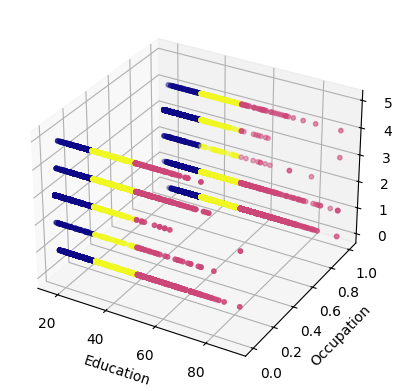

In [32]:
# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Store the normalization of the color encodings based on the number of clusters
nm = Normalize(vmin=0, vmax=len(kmeans.cluster_centers_) - 1)

# Plot the clustered data
scatter1 = ax.scatter(S.iloc[:, 0], S.iloc[:, 1], S.iloc[:, 2], c=kmeans.predict(S), s=10, cmap='plasma', norm=nm)

# Set labels for each axis
ax.set_xlabel('Education')
ax.set_ylabel('Occupation')
ax.set_zlabel('Relationship')

plt.show()

## Hierarchical clustering

In [33]:
#Import the important classes

import sys
import matplotlib
matplotlib.use('Agg')
##########
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering


In [34]:
from sklearn.cluster import AgglomerativeClustering

# Assuming S is your data
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hierarchical_cluster.fit_predict(S)


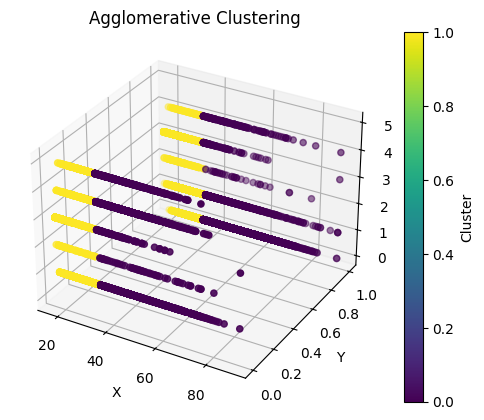

In [35]:
# Plot the clusters in 3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(S.iloc[:, 0], S.iloc[:, 1], S.iloc[:, 2], c=hierarchical_cluster.labels_, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')  # Labeling the z-axis
plt.title('Agglomerative Clustering')

# Create a colorbar manually
plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()



In [36]:
# Print S and cluster labels for reference
print("Data:")
print(S)
print("\nCluster Labels:")
print(hierarchical_cluster.labels_)

# Save the plot
#plt.savefig(sys.stdout.buffer)
#sys.stdout.flush()

Data:
      age  sex  relationship
0      29  0.0           5.0
1      36  1.0           0.0
2      25  0.0           5.0
3      47  1.0           0.0
4      33  1.0           0.0
...   ...  ...           ...
9995   19  0.0           3.0
9996   53  0.0           1.0
9997   30  1.0           0.0
9998   41  0.0           5.0
9999   21  0.0           4.0

[9765 rows x 3 columns]

Cluster Labels:
[1 0 1 ... 1 0 1]


## Task 4.2: Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column (5%). 

## NOTE 1: You should comment on your code wherever necessary and briefly explain what the code is doing.

## NOTE 2: You need to encode the categorical columns, normalise the dataset, and remove the income column before applying the PCA method. 

## HINT: See the examples in the last three slides in Lecture #4 or the Lecture #4 exercise notebook

In [37]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

import pandas as pd
import numpy as np




In [38]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,4.0,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,38.0,>50K
1,36,4.0,15.0,10,2.0,3.0,0.0,4.0,1.0,0,0,45,38.0,<=50K
2,25,0.0,9.0,13,2.0,0.0,5.0,4.0,0.0,0,0,25,38.0,<=50K
3,47,4.0,8.0,11,2.0,6.0,0.0,4.0,1.0,0,0,48,38.0,>50K
4,33,4.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,40,38.0,<=50K


In [39]:
X= df.drop('fnlwgt', axis = 1, inplace = True)
Y= df['income']

KeyError: "['fnlwgt'] not found in axis"

In [ ]:
X

In [ ]:
Y

0        >50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
9995    <=50K
9996    <=50K
9997    <=50K
9998     >50K
9999    <=50K
Name: income, Length: 9765, dtype: object

In [ ]:
# Transform the income column from non-numeric to numeric
Y = pd.get_dummies(Y, columns=['income'])


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y)
Y_df = pd.DataFrame(data = Y_pca, columns = ['principal component 1', 'principal component 2'])

In [ ]:
Y_df

,principal component 1,principal component 2
0,1.067793,6.607284e-13
1,-0.346421,7.389780e-17
2,-0.346421,7.389780e-17
3,1.067793,-2.024320e-16
4,-0.346421,7.389780e-17
...,...,...
9760,-0.346421,6.553160e-17
9761,-0.346421,6.553160e-17
9762,-0.346421,6.553160e-17
9763,1.067793,-1.631826e-16


KeyError: 'income'

<Figure size 640x480 with 0 Axes>

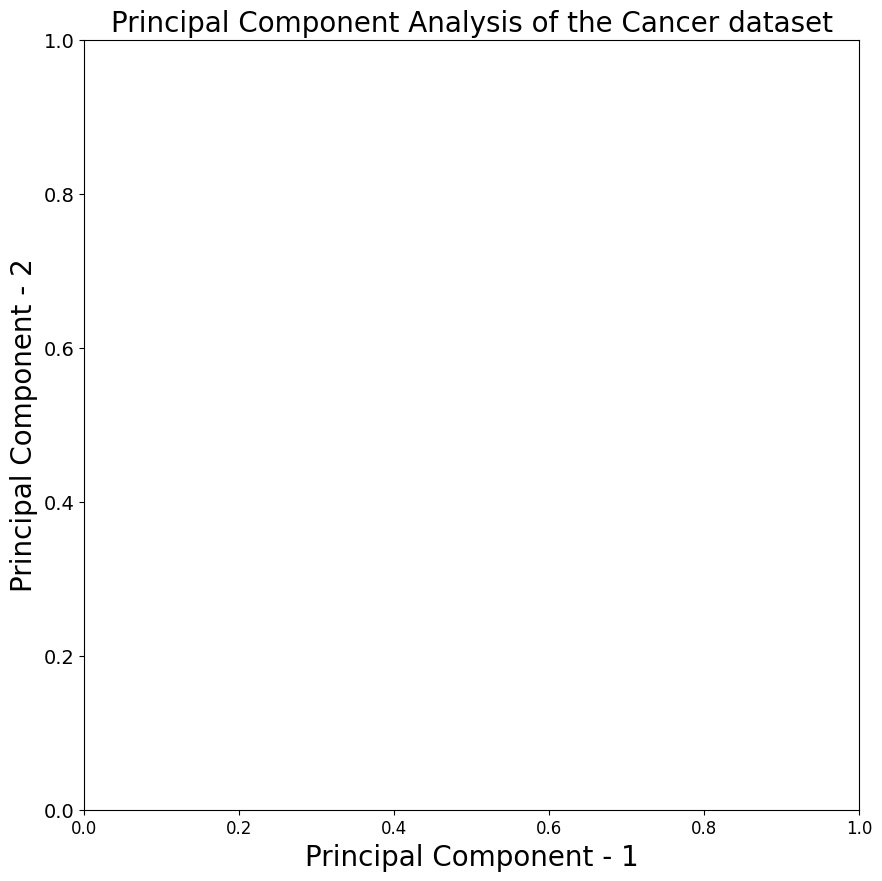

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of the Cancer dataset",fontsize=20)
targets_income = ['M', 'B']
colors = ['r', 'y']
for target, color in zip(targets_income,colors):
    indicesToKeep = Y['income'] == target
    plt.scatter(Y_df.loc[indicesToKeep, 'principal component 1']
               , Y_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets_income,prop={'size': 15})